In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from function_examples import *

%load_ext autoreload
%autoreload 2

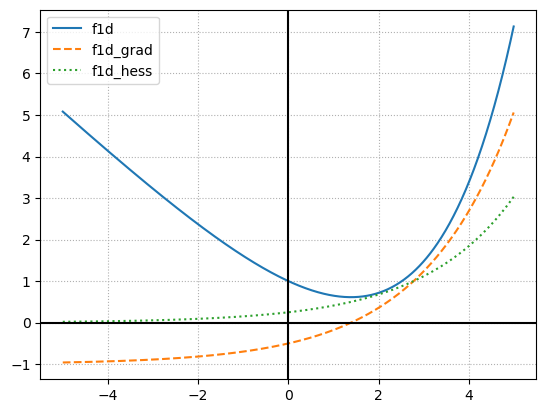

In [2]:
# Plot the 1D convex function
x = np.arange(-5, 5, 0.01)
plot_function_1d(f1d, f1d_grad, f1d_hess, x)

In [3]:
def newton(f, f_grad, f_hess, initial_x, epsilon=1e-12, print_all=True):
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    x_graph = [initial_x]
    y_graph = [f(initial_x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x
        # Newton's method
        x = x - (f_grad(x) / f_hess(x))
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations}, #hessian = {nb_iterations}")
    return x_graph, y_graph

Iteration 1, x = 4.968000066450698, f(x) = 7.021125465028981
Iteration 2, x = 3.30163574233859, f(x) = 1.9096044655047812
Iteration 3, x = 2.069207345347726, f(x) = 0.744783407811874
Iteration 4, x = 1.4906761243437932, f(x) = 0.6164775391853983
Iteration 5, x = 1.3889714737681689, f(x) = 0.613707431412855
Iteration 6, x = 1.3862961520537458, f(x) = 0.6137056388809112
Iteration 7, x = 1.3862943611206926, f(x) = 0.6137056388801094
Iteration 8, x = 1.3862943611198906, f(x) = 0.6137056388801094
#iterations = 8, #gradient = 8, #hessian = 8


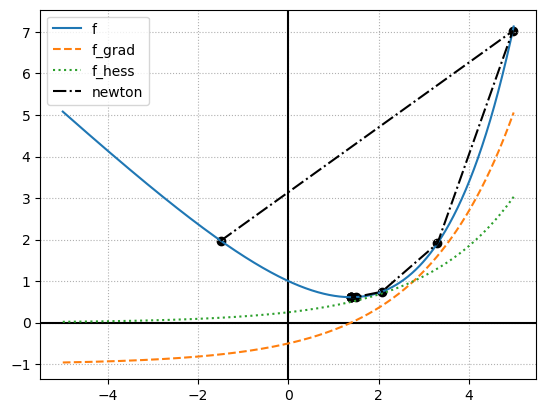

In [4]:
initial_x = -1.5
x1_newton, y1_newton = newton(f1d, f1d_grad, f1d_hess, initial_x)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_newton, y1_newton, 'newton')

In [5]:
def secant(f, f_grad, initial_x, epsilon=1e-12, print_all=True):
    # Store previous x and f_grad to reduce the number of function calls
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    f_grad_prev = f_grad(x_prev)
    f_grad_curr = 0
    x_graph = [x_prev, x]
    y_graph = [f(x_prev), f(x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        # Secant's method
        # Use approximation f''(x) = (f'(x_t) - f'(x_{t-1})) / (x_t - x_{t-1})
        f_grad_curr = f_grad(x)
        f_hess = (f_grad_curr - f_grad_prev) / (x - x_prev)
        # Update variables
        x_prev = x
        f_grad_prev = f_grad_curr
        x = x - (f_grad_curr / f_hess)
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #gradient = {nb_iterations + 1}")
    return x_graph, y_graph

Iteration 1, x = 4.965880855010188, f(x) = 7.010547658579854
Iteration 2, x = -0.641390589365697, f(x) = 1.3670349143571014
Iteration 3, x = -0.006265244619030552, f(x) = 1.0031375238512201
Iteration 4, x = 2.342725077049625, f(x) = 0.883660642767131
Iteration 5, x = 1.050618856004873, f(x) = 0.6403631486142944
Iteration 6, x = 1.3106703788025555, f(x) = 0.6151175341004083
Iteration 7, x = 1.3928615229719474, f(x) = 0.6137164325945856
Iteration 8, x = 1.3861694891954561, f(x) = 0.6137056427782777
Iteration 9, x = 1.3862941562164224, f(x) = 0.6137056388801199
Iteration 10, x = 1.3862943611262875, f(x) = 0.6137056388801092
Iteration 11, x = 1.3862943611198908, f(x) = 0.6137056388801092
Iteration 12, x = 1.3862943611198908, f(x) = 0.6137056388801092
#iterations = 12, #gradient = 13


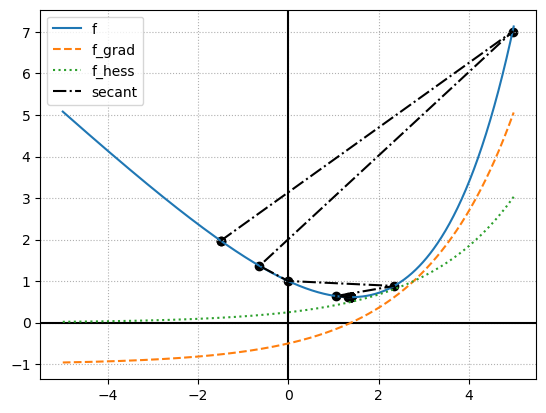

In [6]:
x1_secant, y1_secant = secant(f1d, f1d_grad, initial_x)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_secant, y1_secant, 'secant')

In [7]:
def zero_order_secant2(f, initial_x, h, epsilon=1e-12, print_all=True):
    # Estimate the hessian and gradient locally with 3 function evaluations => O(h^2)
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    x_graph = [initial_x]
    y_graph = [f(initial_x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x
        # Newton's method : x = x - f'(x) / f''(x)
        # Approximate using finite differences :
        # f'(x) = (1/2 f(x + h) - 1/2 f(x - h)) / h + O(h^2)
        # f''(x) = (f(x + h) - 2 f(x) + f(x - h)) / h^2 + O(h^2)
        f_xm1 = f(x - h)
        f_x = f(x)
        f_xp1 = f(x + h)
        f_grad = (f_xp1 - f_xm1) / (2 * h)
        f_hess = (f_xp1 - 2 * f_x + f_xm1) / (h * h)
        # Use similar to secant, use those approximations for Newton's method
        x = x - (f_grad / f_hess)
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #evaluations = {3*nb_iterations}")
    return x_graph, y_graph

Iteration 1, x = 4.965819470964285, f(x) = 7.0102414674477815
Iteration 2, x = 3.299332883586195, f(x) = 1.905910402374011
Iteration 3, x = 2.0672120758225074, f(x) = 0.7439727422220086
Iteration 4, x = 1.489386621926887, f(x) = 0.616408889613465
Iteration 5, x = 1.3880939611113143, f(x) = 0.6137064487630342
Iteration 6, x = 1.3854622813232518, f(x) = 0.6137058119453049
Iteration 7, x = 1.3854610969736554, f(x) = 0.6137058124382897
Iteration 8, x = 1.3854610972200319, f(x) = 0.6137058124381869
Iteration 9, x = 1.3854610972199808, f(x) = 0.6137058124381869
#iterations = 9, #evaluations = 27


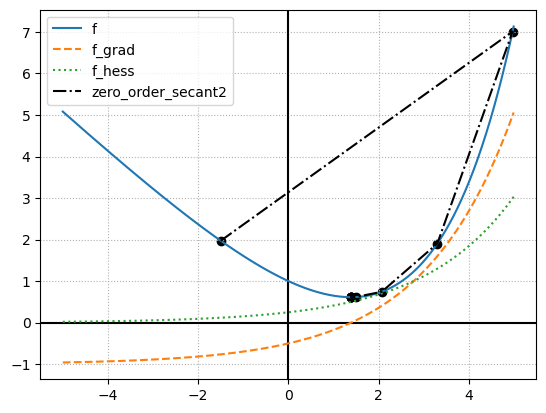

In [8]:
h = 0.1
x1_zero_order_secant2, y1_zero_order_secant2 = zero_order_secant2(f1d, initial_x, h)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_zero_order_secant2, y1_zero_order_secant2, 'zero_order_secant2')

In [9]:
def zero_order_secant4(f, initial_x, h, epsilon=1e-12, print_all=True):
    # Estimate the hessian and gradient locally with 5 function evaluations => O(h^4)
    nb_iterations = 0
    x_prev = initial_x - 2 * epsilon
    x = initial_x
    x_graph = [initial_x]
    y_graph = [f(initial_x)]
    while (abs(x - x_prev) >= epsilon):
        nb_iterations += 1
        x_prev = x
        # Newton's method : x = x - f'(x) / f''(x)
        # Approximate using finite differences :
        # f'(x) = (-1/12 f(x + 2h) + 2/3 f(x + h) - 2/3 f(x - h) + 1/12 f(x - 2h)) / h + O(h^4)
        # f''(x) = (-1/12 f(x + 2h) + 4/3 f(x + h) - 5/2 f(x) + 4/3 f(x - h) - 1/12 f(x - 2h)) / h^2 + O(h^4)
        f_xm2 = f(x - 2 * h)
        f_xm1 = f(x - h)
        f_x = f(x)
        f_xp1 = f(x + h)
        f_xp2 = f(x + 2 * h)
        f_grad = (-f_xp2 + 8*f_xp1 - 8*f_xm1 + f_xm2) / (12 * h)
        f_hess = (-f_xp2 + 16*f_xp1 - 30*f_x + 16*f_xm1 - f_xm2) / (12 * h * h)
        # Use similar to secant, use those approximations for Newton's method
        x = x - (f_grad / f_hess)
        x_graph.append(x)
        y_graph.append(f(x))
        if (print_all):
            print(f"Iteration {nb_iterations}, x = {x}, f(x) = {f(x)}")
    if (print_all):
        print(f"#iterations = {nb_iterations}, #evaluations = {5*nb_iterations}")
    return x_graph, y_graph

Iteration 1, x = 4.968000932510371, f(x) = 7.021129790619501
Iteration 2, x = 3.301636764969225, f(x) = 1.9096061074617694
Iteration 3, x = 2.069208306693638, f(x) = 0.7447837990755404
Iteration 4, x = 1.4906767790342097, f(x) = 0.6164775742617494
Iteration 5, x = 1.3889719167870902, f(x) = 0.6137074320063072
Iteration 6, x = 1.3862965692512637, f(x) = 0.6137056388813282
Iteration 7, x = 1.386294777911678, f(x) = 0.6137056388801527
Iteration 8, x = 1.386294777910625, f(x) = 0.613705638880153
Iteration 9, x = 1.3862947779106232, f(x) = 0.613705638880153
#iterations = 9, #evaluations = 45


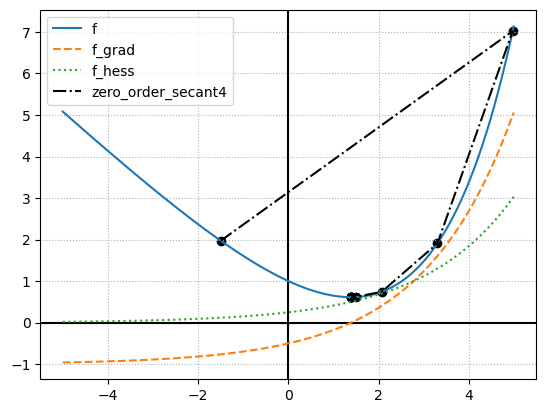

In [10]:
x1_zero_order_secant4, y1_zero_order_secant4 = zero_order_secant4(f1d, initial_x, h)
plot_convergence_1d(f1d, f1d_grad, f1d_hess, x, x1_zero_order_secant4, y1_zero_order_secant4, 'zero_order_secant4')